### 1. 데이터의 확인과 검증셋

In [2]:
import pandas as pd

!git clone https://github.com/taehojo/data.git

# 와인 데이터 불러오기
df = pd.read_csv('./data/wine.csv', header=None) 

# 데이터 확인
df

# 속성12개, 13번째 열: 클래스

fatal: destination path 'data' already exists and is not an empty directory.


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [3]:
x = df.iloc[:,0:12]   # 0~11번쨰 열에 해당하는 속성 12개
y = df.iloc[:,12]     # 13번째 열

### 와인 종류 예측하기: 데이터 확인 및 실행

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [9]:
# 깃허브에 준비된 데이터 불러오기
# !git clone https://github.com/taehojo/data.git

# 와인 데이터 불러오기
# df = pd.read_csv('./data/wine.csv', header=None) 

# 와인의 속성: x, 와인의 분류: y  값 저장
x = df.iloc[:,0:12]
y = df.iloc[:,12]

# 학습셋과 데이터셋 분리하기
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

# 모델 구조 설정
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation ='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행
history = model.fit(x_train, y_train, epochs=50, batch_size=500, validation_split=0.25) # 0.8*0.25=0.2

# 테스트 결과 출력
score = model.evaluate(x_test, y_test)
print('Test accuracy: ', score[1])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                390       
                                                                 
 dense_9 (Dense)             (None, 12)                372       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
8/8 [==============================] - 0s 14ms/step - loss: 0.4270 - accuracy: 0.7652 - val_loss: 0.4313 - val_accuracy: 0.7323
Epoch 2/50
8/8 [==============================] -

### 2. 모델 업데이트 하기

In [10]:
modelpath = "./data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"

In [13]:
# 모델이 저장되는 조건 설정
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=True)

# 모델 실행
history = model.fit(x_train, y_train, epochs=50, batch_size=500, validation_split=0.25, 
                    verbose=False, callbacks=[checkpointer])

# 테스트 결과 출력
score = model.evaluate(x_test, y_test)
print('Test accuracy: ', score[1])


Epoch 1: saving model to ./data/model/all\01-0.9600.hdf5

Epoch 2: saving model to ./data/model/all\02-0.9662.hdf5

Epoch 3: saving model to ./data/model/all\03-0.9531.hdf5

Epoch 4: saving model to ./data/model/all\04-0.9623.hdf5

Epoch 5: saving model to ./data/model/all\05-0.9538.hdf5

Epoch 6: saving model to ./data/model/all\06-0.9523.hdf5

Epoch 7: saving model to ./data/model/all\07-0.9515.hdf5

Epoch 8: saving model to ./data/model/all\08-0.9523.hdf5

Epoch 9: saving model to ./data/model/all\09-0.9600.hdf5

Epoch 10: saving model to ./data/model/all\10-0.9623.hdf5

Epoch 11: saving model to ./data/model/all\11-0.9677.hdf5

Epoch 12: saving model to ./data/model/all\12-0.9623.hdf5

Epoch 13: saving model to ./data/model/all\13-0.9623.hdf5

Epoch 14: saving model to ./data/model/all\14-0.9608.hdf5

Epoch 15: saving model to ./data/model/all\15-0.9615.hdf5

Epoch 16: saving model to ./data/model/all\16-0.9631.hdf5

Epoch 17: saving model to ./data/model/all\17-0.9638.hdf5

Epoch

### 3. 그래프로 과적합 확인

In [14]:
history = model.fit(x_train, y_train, epochs=2000, batch_size=500, validation_split=0.25)

Epoch 1/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0657 - accuracy: 0.9833 - val_loss: 0.0732 - val_accuracy: 0.9731
Epoch 2/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0639 - accuracy: 0.9831 - val_loss: 0.0734 - val_accuracy: 0.9715
Epoch 3/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0640 - accuracy: 0.9818 - val_loss: 0.0736 - val_accuracy: 0.9715
Epoch 4/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0637 - accuracy: 0.9820 - val_loss: 0.0723 - val_accuracy: 0.9723
Epoch 5/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0648 - accuracy: 0.9818 - val_loss: 0.0776 - val_accuracy: 0.9677
Epoch 6/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0634 - accuracy: 0.9828 - val_loss: 0.0755 - val_accuracy: 0.9692
Epoch 7/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0627 - accuracy: 0.9826 - val_loss: 0.0716 - val_accuracy: 0.9731
Epoch 8/2000
8/8 [==

8/8 [==============================] - 0s 3ms/step - loss: 0.0585 - accuracy: 0.9838 - val_loss: 0.0647 - val_accuracy: 0.9762
Epoch 60/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0569 - accuracy: 0.9823 - val_loss: 0.0616 - val_accuracy: 0.9777
Epoch 61/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0571 - accuracy: 0.9851 - val_loss: 0.0645 - val_accuracy: 0.9738
Epoch 62/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0559 - accuracy: 0.9856 - val_loss: 0.0640 - val_accuracy: 0.9754
Epoch 63/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0564 - accuracy: 0.9849 - val_loss: 0.0672 - val_accuracy: 0.9723
Epoch 64/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0553 - accuracy: 0.9854 - val_loss: 0.0671 - val_accuracy: 0.9708
Epoch 65/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0563 - accuracy: 0.9849 - val_loss: 0.0671 - val_accuracy: 0.9685
Epoch 66/2000
8/8 [========

8/8 [==============================] - 0s 3ms/step - loss: 0.0547 - accuracy: 0.9843 - val_loss: 0.0753 - val_accuracy: 0.9700
Epoch 118/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0597 - accuracy: 0.9831 - val_loss: 0.0900 - val_accuracy: 0.9646
Epoch 119/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0551 - accuracy: 0.9859 - val_loss: 0.0778 - val_accuracy: 0.9662
Epoch 120/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0535 - accuracy: 0.9851 - val_loss: 0.0631 - val_accuracy: 0.9746
Epoch 121/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0516 - accuracy: 0.9856 - val_loss: 0.0599 - val_accuracy: 0.9754
Epoch 122/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0510 - accuracy: 0.9867 - val_loss: 0.0582 - val_accuracy: 0.9792
Epoch 123/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0521 - accuracy: 0.9846 - val_loss: 0.0632 - val_accuracy: 0.9823
Epoch 124/2000
8/8 [=

Epoch 175/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9843 - val_loss: 0.0631 - val_accuracy: 0.9731
Epoch 176/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0513 - accuracy: 0.9861 - val_loss: 0.0864 - val_accuracy: 0.9654
Epoch 177/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0512 - accuracy: 0.9849 - val_loss: 0.0603 - val_accuracy: 0.9754
Epoch 178/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0510 - accuracy: 0.9849 - val_loss: 0.0584 - val_accuracy: 0.9769
Epoch 179/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0485 - accuracy: 0.9874 - val_loss: 0.0580 - val_accuracy: 0.9785
Epoch 180/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0501 - accuracy: 0.9854 - val_loss: 0.0573 - val_accuracy: 0.9777
Epoch 181/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0486 - accuracy: 0.9856 - val_loss: 0.0577 - val_accuracy: 0.9777
Epoch 

Epoch 233/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0467 - accuracy: 0.9872 - val_loss: 0.0619 - val_accuracy: 0.9746
Epoch 234/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0481 - accuracy: 0.9872 - val_loss: 0.0551 - val_accuracy: 0.9792
Epoch 235/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0482 - accuracy: 0.9864 - val_loss: 0.0621 - val_accuracy: 0.9723
Epoch 236/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0467 - accuracy: 0.9892 - val_loss: 0.0549 - val_accuracy: 0.9815
Epoch 237/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0471 - accuracy: 0.9864 - val_loss: 0.0616 - val_accuracy: 0.9746
Epoch 238/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0471 - accuracy: 0.9867 - val_loss: 0.0603 - val_accuracy: 0.9746
Epoch 239/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0470 - accuracy: 0.9869 - val_loss: 0.0742 - val_accuracy: 0.9700
Epoch 

Epoch 291/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0462 - accuracy: 0.9872 - val_loss: 0.0560 - val_accuracy: 0.9769
Epoch 292/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0459 - accuracy: 0.9867 - val_loss: 0.0543 - val_accuracy: 0.9831
Epoch 293/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0452 - accuracy: 0.9872 - val_loss: 0.0630 - val_accuracy: 0.9738
Epoch 294/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0455 - accuracy: 0.9864 - val_loss: 0.0671 - val_accuracy: 0.9723
Epoch 295/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0487 - accuracy: 0.9867 - val_loss: 0.0796 - val_accuracy: 0.9692
Epoch 296/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0553 - accuracy: 0.9843 - val_loss: 0.0641 - val_accuracy: 0.9723
Epoch 297/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0485 - accuracy: 0.9864 - val_loss: 0.0601 - val_accuracy: 0.9754
Epoch 

Epoch 349/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0453 - accuracy: 0.9879 - val_loss: 0.0627 - val_accuracy: 0.9754
Epoch 350/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0446 - accuracy: 0.9879 - val_loss: 0.0705 - val_accuracy: 0.9723
Epoch 351/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0453 - accuracy: 0.9867 - val_loss: 0.0703 - val_accuracy: 0.9731
Epoch 352/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0464 - accuracy: 0.9872 - val_loss: 0.0558 - val_accuracy: 0.9808
Epoch 353/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0475 - accuracy: 0.9861 - val_loss: 0.0583 - val_accuracy: 0.9762
Epoch 354/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0454 - accuracy: 0.9867 - val_loss: 0.0549 - val_accuracy: 0.9815
Epoch 355/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0454 - accuracy: 0.9867 - val_loss: 0.0548 - val_accuracy: 0.9838
Epoch 

Epoch 407/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0442 - accuracy: 0.9879 - val_loss: 0.0591 - val_accuracy: 0.9762
Epoch 408/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0436 - accuracy: 0.9872 - val_loss: 0.0660 - val_accuracy: 0.9738
Epoch 409/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0461 - accuracy: 0.9856 - val_loss: 0.0675 - val_accuracy: 0.9746
Epoch 410/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0470 - accuracy: 0.9874 - val_loss: 0.0616 - val_accuracy: 0.9754
Epoch 411/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0448 - accuracy: 0.9859 - val_loss: 0.0526 - val_accuracy: 0.9785
Epoch 412/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0454 - accuracy: 0.9869 - val_loss: 0.0579 - val_accuracy: 0.9754
Epoch 413/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0440 - accuracy: 0.9892 - val_loss: 0.0659 - val_accuracy: 0.9723
Epoch 

Epoch 465/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0436 - accuracy: 0.9877 - val_loss: 0.0632 - val_accuracy: 0.9754
Epoch 466/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0436 - accuracy: 0.9869 - val_loss: 0.0614 - val_accuracy: 0.9762
Epoch 467/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0427 - accuracy: 0.9877 - val_loss: 0.0559 - val_accuracy: 0.9815
Epoch 468/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0426 - accuracy: 0.9872 - val_loss: 0.0562 - val_accuracy: 0.9808
Epoch 469/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0422 - accuracy: 0.9874 - val_loss: 0.0694 - val_accuracy: 0.9731
Epoch 470/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0449 - accuracy: 0.9864 - val_loss: 0.0825 - val_accuracy: 0.9685
Epoch 471/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0478 - accuracy: 0.9861 - val_loss: 0.0648 - val_accuracy: 0.9738
Epoch 

Epoch 523/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0422 - accuracy: 0.9874 - val_loss: 0.0657 - val_accuracy: 0.9715
Epoch 524/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0426 - accuracy: 0.9874 - val_loss: 0.0568 - val_accuracy: 0.9762
Epoch 525/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0423 - accuracy: 0.9877 - val_loss: 0.0587 - val_accuracy: 0.9762
Epoch 526/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0437 - accuracy: 0.9869 - val_loss: 0.0580 - val_accuracy: 0.9785
Epoch 527/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0423 - accuracy: 0.9867 - val_loss: 0.0574 - val_accuracy: 0.9838
Epoch 528/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0404 - accuracy: 0.9882 - val_loss: 0.0636 - val_accuracy: 0.9754
Epoch 529/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0447 - accuracy: 0.9869 - val_loss: 0.0604 - val_accuracy: 0.9762
Epoch 

Epoch 581/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0405 - accuracy: 0.9867 - val_loss: 0.0602 - val_accuracy: 0.9831
Epoch 582/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0437 - accuracy: 0.9874 - val_loss: 0.0637 - val_accuracy: 0.9838
Epoch 583/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0397 - accuracy: 0.9902 - val_loss: 0.0749 - val_accuracy: 0.9692
Epoch 584/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0447 - accuracy: 0.9879 - val_loss: 0.0635 - val_accuracy: 0.9738
Epoch 585/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0425 - accuracy: 0.9874 - val_loss: 0.0668 - val_accuracy: 0.9731
Epoch 586/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0414 - accuracy: 0.9872 - val_loss: 0.0573 - val_accuracy: 0.9800
Epoch 587/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0422 - accuracy: 0.9869 - val_loss: 0.0609 - val_accuracy: 0.9785
Epoch 

Epoch 639/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0426 - accuracy: 0.9864 - val_loss: 0.0700 - val_accuracy: 0.9700
Epoch 640/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0441 - accuracy: 0.9882 - val_loss: 0.0790 - val_accuracy: 0.9685
Epoch 641/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0425 - accuracy: 0.9879 - val_loss: 0.0673 - val_accuracy: 0.9723
Epoch 642/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0428 - accuracy: 0.9872 - val_loss: 0.0776 - val_accuracy: 0.9700
Epoch 643/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0427 - accuracy: 0.9882 - val_loss: 0.0700 - val_accuracy: 0.9754
Epoch 644/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0408 - accuracy: 0.9874 - val_loss: 0.0600 - val_accuracy: 0.9808
Epoch 645/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0391 - accuracy: 0.9882 - val_loss: 0.0586 - val_accuracy: 0.9838
Epoch 

Epoch 697/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0411 - accuracy: 0.9877 - val_loss: 0.0637 - val_accuracy: 0.9785
Epoch 698/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0404 - accuracy: 0.9872 - val_loss: 0.0647 - val_accuracy: 0.9785
Epoch 699/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0414 - accuracy: 0.9879 - val_loss: 0.0616 - val_accuracy: 0.9792
Epoch 700/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0395 - accuracy: 0.9879 - val_loss: 0.0582 - val_accuracy: 0.9769
Epoch 701/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0409 - accuracy: 0.9882 - val_loss: 0.0608 - val_accuracy: 0.9762
Epoch 702/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0405 - accuracy: 0.9885 - val_loss: 0.0615 - val_accuracy: 0.9746
Epoch 703/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0413 - accuracy: 0.9887 - val_loss: 0.0699 - val_accuracy: 0.9723
Epoch 

Epoch 755/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0385 - accuracy: 0.9887 - val_loss: 0.0657 - val_accuracy: 0.9777
Epoch 756/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0389 - accuracy: 0.9879 - val_loss: 0.0652 - val_accuracy: 0.9769
Epoch 757/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0395 - accuracy: 0.9885 - val_loss: 0.0757 - val_accuracy: 0.9723
Epoch 758/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0408 - accuracy: 0.9867 - val_loss: 0.0662 - val_accuracy: 0.9777
Epoch 759/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0400 - accuracy: 0.9890 - val_loss: 0.0593 - val_accuracy: 0.9854
Epoch 760/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0402 - accuracy: 0.9892 - val_loss: 0.0635 - val_accuracy: 0.9854
Epoch 761/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0444 - accuracy: 0.9867 - val_loss: 0.0652 - val_accuracy: 0.9862
Epoch 

Epoch 813/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0433 - accuracy: 0.9872 - val_loss: 0.0756 - val_accuracy: 0.9715
Epoch 814/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0435 - accuracy: 0.9867 - val_loss: 0.0597 - val_accuracy: 0.9800
Epoch 815/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9849 - val_loss: 0.0681 - val_accuracy: 0.9823
Epoch 816/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0441 - accuracy: 0.9874 - val_loss: 0.0622 - val_accuracy: 0.9854
Epoch 817/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0392 - accuracy: 0.9879 - val_loss: 0.0598 - val_accuracy: 0.9800
Epoch 818/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0371 - accuracy: 0.9879 - val_loss: 0.0609 - val_accuracy: 0.9815
Epoch 819/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0380 - accuracy: 0.9895 - val_loss: 0.0587 - val_accuracy: 0.9831
Epoch 

Epoch 871/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0415 - accuracy: 0.9874 - val_loss: 0.0690 - val_accuracy: 0.9746
Epoch 872/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0393 - accuracy: 0.9892 - val_loss: 0.0583 - val_accuracy: 0.9815
Epoch 873/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0388 - accuracy: 0.9879 - val_loss: 0.0592 - val_accuracy: 0.9815
Epoch 874/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0361 - accuracy: 0.9892 - val_loss: 0.0697 - val_accuracy: 0.9746
Epoch 875/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0397 - accuracy: 0.9872 - val_loss: 0.0833 - val_accuracy: 0.9708
Epoch 876/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0462 - accuracy: 0.9869 - val_loss: 0.1215 - val_accuracy: 0.9608
Epoch 877/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0509 - accuracy: 0.9864 - val_loss: 0.1214 - val_accuracy: 0.9623
Epoch 

Epoch 929/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0431 - accuracy: 0.9872 - val_loss: 0.0686 - val_accuracy: 0.9731
Epoch 930/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0411 - accuracy: 0.9856 - val_loss: 0.0607 - val_accuracy: 0.9785
Epoch 931/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0370 - accuracy: 0.9890 - val_loss: 0.0595 - val_accuracy: 0.9800
Epoch 932/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0369 - accuracy: 0.9895 - val_loss: 0.0795 - val_accuracy: 0.9708
Epoch 933/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0392 - accuracy: 0.9882 - val_loss: 0.0648 - val_accuracy: 0.9785
Epoch 934/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0364 - accuracy: 0.9879 - val_loss: 0.0630 - val_accuracy: 0.9800
Epoch 935/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0370 - accuracy: 0.9885 - val_loss: 0.0592 - val_accuracy: 0.9823
Epoch 

Epoch 987/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0410 - accuracy: 0.9887 - val_loss: 0.0552 - val_accuracy: 0.9846
Epoch 988/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0393 - accuracy: 0.9882 - val_loss: 0.0595 - val_accuracy: 0.9792
Epoch 989/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0374 - accuracy: 0.9887 - val_loss: 0.0561 - val_accuracy: 0.9831
Epoch 990/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0361 - accuracy: 0.9885 - val_loss: 0.0604 - val_accuracy: 0.9808
Epoch 991/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0362 - accuracy: 0.9890 - val_loss: 0.0629 - val_accuracy: 0.9869
Epoch 992/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0366 - accuracy: 0.9895 - val_loss: 0.0664 - val_accuracy: 0.9777
Epoch 993/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0374 - accuracy: 0.9882 - val_loss: 0.0583 - val_accuracy: 0.9823
Epoch 

8/8 [==============================] - 0s 3ms/step - loss: 0.0379 - accuracy: 0.9879 - val_loss: 0.0630 - val_accuracy: 0.9792
Epoch 1045/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0354 - accuracy: 0.9900 - val_loss: 0.0665 - val_accuracy: 0.9746
Epoch 1046/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0358 - accuracy: 0.9882 - val_loss: 0.0548 - val_accuracy: 0.9854
Epoch 1047/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0382 - accuracy: 0.9890 - val_loss: 0.0655 - val_accuracy: 0.9854
Epoch 1048/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0381 - accuracy: 0.9887 - val_loss: 0.0624 - val_accuracy: 0.9854
Epoch 1049/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0370 - accuracy: 0.9885 - val_loss: 0.0575 - val_accuracy: 0.9862
Epoch 1050/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0395 - accuracy: 0.9872 - val_loss: 0.0593 - val_accuracy: 0.9854
Epoch 1051/2000

8/8 [==============================] - 0s 3ms/step - loss: 0.0337 - accuracy: 0.9900 - val_loss: 0.0628 - val_accuracy: 0.9808
Epoch 1102/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0330 - accuracy: 0.9908 - val_loss: 0.0617 - val_accuracy: 0.9808
Epoch 1103/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0338 - accuracy: 0.9897 - val_loss: 0.0603 - val_accuracy: 0.9846
Epoch 1104/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0331 - accuracy: 0.9902 - val_loss: 0.0612 - val_accuracy: 0.9854
Epoch 1105/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0338 - accuracy: 0.9897 - val_loss: 0.0611 - val_accuracy: 0.9838
Epoch 1106/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0330 - accuracy: 0.9908 - val_loss: 0.0599 - val_accuracy: 0.9838
Epoch 1107/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0338 - accuracy: 0.9897 - val_loss: 0.0623 - val_accuracy: 0.9854
Epoch 1108/2000

8/8 [==============================] - 0s 3ms/step - loss: 0.0323 - accuracy: 0.9908 - val_loss: 0.0664 - val_accuracy: 0.9815
Epoch 1159/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0322 - accuracy: 0.9908 - val_loss: 0.0682 - val_accuracy: 0.9800
Epoch 1160/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0333 - accuracy: 0.9915 - val_loss: 0.0623 - val_accuracy: 0.9869
Epoch 1161/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0324 - accuracy: 0.9905 - val_loss: 0.0636 - val_accuracy: 0.9854
Epoch 1162/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0327 - accuracy: 0.9908 - val_loss: 0.0652 - val_accuracy: 0.9854
Epoch 1163/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0347 - accuracy: 0.9902 - val_loss: 0.0645 - val_accuracy: 0.9831
Epoch 1164/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0342 - accuracy: 0.9905 - val_loss: 0.0634 - val_accuracy: 0.9831
Epoch 1165/2000

8/8 [==============================] - 0s 3ms/step - loss: 0.0332 - accuracy: 0.9910 - val_loss: 0.0611 - val_accuracy: 0.9846
Epoch 1216/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0342 - accuracy: 0.9915 - val_loss: 0.0626 - val_accuracy: 0.9823
Epoch 1217/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0337 - accuracy: 0.9908 - val_loss: 0.0626 - val_accuracy: 0.9838
Epoch 1218/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0331 - accuracy: 0.9900 - val_loss: 0.0779 - val_accuracy: 0.9754
Epoch 1219/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0310 - accuracy: 0.9918 - val_loss: 0.0626 - val_accuracy: 0.9838
Epoch 1220/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0346 - accuracy: 0.9902 - val_loss: 0.0647 - val_accuracy: 0.9838
Epoch 1221/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0341 - accuracy: 0.9890 - val_loss: 0.0658 - val_accuracy: 0.9831
Epoch 1222/2000

8/8 [==============================] - 0s 3ms/step - loss: 0.0439 - accuracy: 0.9869 - val_loss: 0.0851 - val_accuracy: 0.9723
Epoch 1273/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0388 - accuracy: 0.9900 - val_loss: 0.0615 - val_accuracy: 0.9838
Epoch 1274/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0317 - accuracy: 0.9905 - val_loss: 0.0629 - val_accuracy: 0.9808
Epoch 1275/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0351 - accuracy: 0.9900 - val_loss: 0.0604 - val_accuracy: 0.9854
Epoch 1276/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0355 - accuracy: 0.9902 - val_loss: 0.0637 - val_accuracy: 0.9838
Epoch 1277/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0317 - accuracy: 0.9910 - val_loss: 0.0652 - val_accuracy: 0.9869
Epoch 1278/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0338 - accuracy: 0.9902 - val_loss: 0.0607 - val_accuracy: 0.9838
Epoch 1279/2000

8/8 [==============================] - 0s 5ms/step - loss: 0.0311 - accuracy: 0.9918 - val_loss: 0.0709 - val_accuracy: 0.9762
Epoch 1330/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0310 - accuracy: 0.9918 - val_loss: 0.0733 - val_accuracy: 0.9800
Epoch 1331/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0312 - accuracy: 0.9910 - val_loss: 0.0805 - val_accuracy: 0.9769
Epoch 1332/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0323 - accuracy: 0.9908 - val_loss: 0.0682 - val_accuracy: 0.9792
Epoch 1333/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0308 - accuracy: 0.9908 - val_loss: 0.0710 - val_accuracy: 0.9815
Epoch 1334/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.9915 - val_loss: 0.0725 - val_accuracy: 0.9862
Epoch 1335/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.9920 - val_loss: 0.0656 - val_accuracy: 0.9854
Epoch 1336/2000

8/8 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.9905 - val_loss: 0.0770 - val_accuracy: 0.9831
Epoch 1387/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.9920 - val_loss: 0.0661 - val_accuracy: 0.9846
Epoch 1388/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0339 - accuracy: 0.9900 - val_loss: 0.0681 - val_accuracy: 0.9838
Epoch 1389/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0338 - accuracy: 0.9892 - val_loss: 0.0706 - val_accuracy: 0.9846
Epoch 1390/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0331 - accuracy: 0.9913 - val_loss: 0.0744 - val_accuracy: 0.9846
Epoch 1391/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0.9923 - val_loss: 0.0697 - val_accuracy: 0.9823
Epoch 1392/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0291 - accuracy: 0.9923 - val_loss: 0.1026 - val_accuracy: 0.9677
Epoch 1393/2000

8/8 [==============================] - 0s 3ms/step - loss: 0.0331 - accuracy: 0.9900 - val_loss: 0.0724 - val_accuracy: 0.9862
Epoch 1444/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.9915 - val_loss: 0.0677 - val_accuracy: 0.9846
Epoch 1445/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.9913 - val_loss: 0.0693 - val_accuracy: 0.9846
Epoch 1446/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0287 - accuracy: 0.9915 - val_loss: 0.0724 - val_accuracy: 0.9838
Epoch 1447/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.9905 - val_loss: 0.0763 - val_accuracy: 0.9823
Epoch 1448/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.9915 - val_loss: 0.0838 - val_accuracy: 0.9746
Epoch 1449/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.9908 - val_loss: 0.1054 - val_accuracy: 0.9708
Epoch 1450/2000

8/8 [==============================] - 0s 3ms/step - loss: 0.0298 - accuracy: 0.9918 - val_loss: 0.0705 - val_accuracy: 0.9869
Epoch 1501/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0291 - accuracy: 0.9908 - val_loss: 0.0713 - val_accuracy: 0.9846
Epoch 1502/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0298 - accuracy: 0.9910 - val_loss: 0.0762 - val_accuracy: 0.9838
Epoch 1503/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.9918 - val_loss: 0.0695 - val_accuracy: 0.9831
Epoch 1504/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.9918 - val_loss: 0.0715 - val_accuracy: 0.9808
Epoch 1505/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.9918 - val_loss: 0.0715 - val_accuracy: 0.9869
Epoch 1506/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.9923 - val_loss: 0.0738 - val_accuracy: 0.9838
Epoch 1507/2000

8/8 [==============================] - 0s 3ms/step - loss: 0.0298 - accuracy: 0.9915 - val_loss: 0.0738 - val_accuracy: 0.9862
Epoch 1558/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.9908 - val_loss: 0.0762 - val_accuracy: 0.9862
Epoch 1559/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0318 - accuracy: 0.9905 - val_loss: 0.0804 - val_accuracy: 0.9777
Epoch 1560/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0410 - accuracy: 0.9885 - val_loss: 0.0941 - val_accuracy: 0.9754
Epoch 1561/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0368 - accuracy: 0.9882 - val_loss: 0.0897 - val_accuracy: 0.9746
Epoch 1562/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0313 - accuracy: 0.9908 - val_loss: 0.0760 - val_accuracy: 0.9792
Epoch 1563/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.9920 - val_loss: 0.0754 - val_accuracy: 0.9800
Epoch 1564/2000

8/8 [==============================] - 0s 3ms/step - loss: 0.0332 - accuracy: 0.9910 - val_loss: 0.0739 - val_accuracy: 0.9846
Epoch 1615/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0376 - accuracy: 0.9908 - val_loss: 0.1015 - val_accuracy: 0.9777
Epoch 1616/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0476 - accuracy: 0.9846 - val_loss: 0.0890 - val_accuracy: 0.9808
Epoch 1617/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 0.9897 - val_loss: 0.0701 - val_accuracy: 0.9854
Epoch 1618/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.9913 - val_loss: 0.0759 - val_accuracy: 0.9823
Epoch 1619/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.9905 - val_loss: 0.0714 - val_accuracy: 0.9862
Epoch 1620/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.9923 - val_loss: 0.0881 - val_accuracy: 0.9808
Epoch 1621/2000

8/8 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 0.9915 - val_loss: 0.0921 - val_accuracy: 0.9762
Epoch 1672/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.9910 - val_loss: 0.0936 - val_accuracy: 0.9762
Epoch 1673/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.9910 - val_loss: 0.0889 - val_accuracy: 0.9762
Epoch 1674/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0327 - accuracy: 0.9897 - val_loss: 0.1053 - val_accuracy: 0.9754
Epoch 1675/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.9910 - val_loss: 0.0938 - val_accuracy: 0.9785
Epoch 1676/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9920 - val_loss: 0.0837 - val_accuracy: 0.9823
Epoch 1677/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.9913 - val_loss: 0.0827 - val_accuracy: 0.9862
Epoch 1678/2000

8/8 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.9920 - val_loss: 0.0768 - val_accuracy: 0.9862
Epoch 1729/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.9933 - val_loss: 0.0769 - val_accuracy: 0.9823
Epoch 1730/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.9923 - val_loss: 0.0789 - val_accuracy: 0.9823
Epoch 1731/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.9918 - val_loss: 0.0733 - val_accuracy: 0.9869
Epoch 1732/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.9915 - val_loss: 0.0748 - val_accuracy: 0.9862
Epoch 1733/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.9920 - val_loss: 0.0758 - val_accuracy: 0.9869
Epoch 1734/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.9923 - val_loss: 0.0793 - val_accuracy: 0.9869
Epoch 1735/2000

8/8 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.9923 - val_loss: 0.1098 - val_accuracy: 0.9746
Epoch 1786/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0313 - accuracy: 0.9915 - val_loss: 0.0977 - val_accuracy: 0.9754
Epoch 1787/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.9920 - val_loss: 0.0847 - val_accuracy: 0.9831
Epoch 1788/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.9920 - val_loss: 0.0786 - val_accuracy: 0.9862
Epoch 1789/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 0.9931 - val_loss: 0.0872 - val_accuracy: 0.9854
Epoch 1790/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9923 - val_loss: 0.0827 - val_accuracy: 0.9838
Epoch 1791/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.9920 - val_loss: 0.0908 - val_accuracy: 0.9777
Epoch 1792/2000

8/8 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.9920 - val_loss: 0.0784 - val_accuracy: 0.9815
Epoch 1843/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0248 - accuracy: 0.9933 - val_loss: 0.0798 - val_accuracy: 0.9862
Epoch 1844/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 0.9928 - val_loss: 0.0884 - val_accuracy: 0.9854
Epoch 1845/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0251 - accuracy: 0.9928 - val_loss: 0.0820 - val_accuracy: 0.9862
Epoch 1846/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.9926 - val_loss: 0.0787 - val_accuracy: 0.9869
Epoch 1847/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.9915 - val_loss: 0.0865 - val_accuracy: 0.9831
Epoch 1848/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.9915 - val_loss: 0.0897 - val_accuracy: 0.9815
Epoch 1849/2000

8/8 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.9931 - val_loss: 0.0930 - val_accuracy: 0.9846
Epoch 1900/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9933 - val_loss: 0.0933 - val_accuracy: 0.9823
Epoch 1901/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0258 - accuracy: 0.9931 - val_loss: 0.1114 - val_accuracy: 0.9769
Epoch 1902/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.9926 - val_loss: 0.0862 - val_accuracy: 0.9838
Epoch 1903/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0259 - accuracy: 0.9926 - val_loss: 0.0963 - val_accuracy: 0.9808
Epoch 1904/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0257 - accuracy: 0.9931 - val_loss: 0.0920 - val_accuracy: 0.9823
Epoch 1905/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.9926 - val_loss: 0.0843 - val_accuracy: 0.9854
Epoch 1906/2000

8/8 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.9928 - val_loss: 0.0847 - val_accuracy: 0.9854
Epoch 1957/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.9913 - val_loss: 0.0821 - val_accuracy: 0.9869
Epoch 1958/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0257 - accuracy: 0.9926 - val_loss: 0.0891 - val_accuracy: 0.9838
Epoch 1959/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0248 - accuracy: 0.9923 - val_loss: 0.0868 - val_accuracy: 0.9862
Epoch 1960/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0258 - accuracy: 0.9923 - val_loss: 0.0971 - val_accuracy: 0.9815
Epoch 1961/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0253 - accuracy: 0.9923 - val_loss: 0.0989 - val_accuracy: 0.9815
Epoch 1962/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0252 - accuracy: 0.9928 - val_loss: 0.0913 - val_accuracy: 0.9846
Epoch 1963/2000

In [15]:
hist_df = pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.065701,0.983320,0.073168,0.973077
1,0.063884,0.983064,0.073394,0.971538
2,0.063976,0.981781,0.073604,0.971538
3,0.063702,0.982037,0.072263,0.972308
4,0.064814,0.981781,0.077566,0.967692
...,...,...,...,...
1995,0.025518,0.993072,0.099624,0.980000
1996,0.027145,0.992045,0.099511,0.980000
1997,0.025645,0.993328,0.085166,0.985385
1998,0.028119,0.992045,0.096566,0.980769


In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
y_vloss = hist_df['val_loss']
y_loss = hist_df['loss']

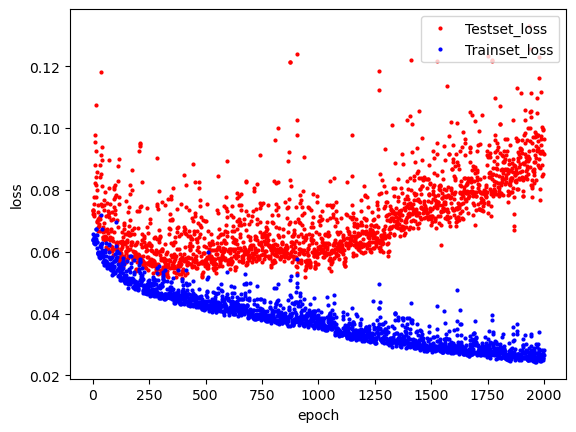

In [26]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 4. 학습의 자동 중단

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

# 학습이 언제 자동 중단될지 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

# 최적화 모델이 저장될 폴더와 모델 이름 정하기
modelpath = "./data/model/ch14-4-bestmodel.hdf5"

# 최적화 모델 업데이트하고 저장하기
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', 
                               verbose=0, save_best_only=True)

# 모델 실행
history = model.fit(x_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1, 
                    callbacks=[early_stopping_callback, checkpointer])

Epoch 1/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0245 - accuracy: 0.9926 - val_loss: 0.0944 - val_accuracy: 0.9831
Epoch 2/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0265 - accuracy: 0.9920 - val_loss: 0.0879 - val_accuracy: 0.9862
Epoch 3/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0254 - accuracy: 0.9933 - val_loss: 0.0863 - val_accuracy: 0.9854
Epoch 4/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0250 - accuracy: 0.9931 - val_loss: 0.0937 - val_accuracy: 0.9862
Epoch 5/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0242 - accuracy: 0.9926 - val_loss: 0.0880 - val_accuracy: 0.9838
Epoch 6/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0258 - accuracy: 0.9920 - val_loss: 0.1244 - val_accuracy: 0.9731
Epoch 7/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.9931 - val_loss: 0.0949 - val_accuracy: 0.9792
Epoch 8/2000
8/8 [==

In [28]:
# 지금까지 만든 모델 테스트
score = model.evaluate(x_test, y_test)
print('Test accuracy: ', score[1])

41/41 [==============================] - 0s 600us/step - loss: 0.0831 - accuracy: 0.9885
Test accuracy:  0.9884615540504456
